In [37]:
import pandas as pd

# Load the data into a DataFrame
df = pd.read_csv('stock.csv')

# 1. Total number of rows and columns
total_rows, total_columns = df.shape
print("Total rows:", total_rows)
print("Total columns:", total_columns)

# 2. Check for null values and calculate total null values
null_values = df.isnull().sum().sum()
print("Total null values:", null_values)

# Alternatively, you can check for null values per column
null_values_per_column = df.isnull().sum()
print("Null values per column:")
print(null_values_per_column)
print(df)

Total rows: 602962
Total columns: 9
Total null values: 0
Null values per column:
Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Company         0
dtype: int64
                             Date        Open        High         Low  \
0       2018-11-29 00:00:00-05:00   43.829761   43.863354   42.639594   
1       2018-11-29 00:00:00-05:00  104.769074  105.519257  103.534595   
2       2018-11-29 00:00:00-05:00   54.176498   55.007500   54.099998   
3       2018-11-29 00:00:00-05:00   83.749496   84.499496   82.616501   
4       2018-11-29 00:00:00-05:00   39.692784   40.064904   38.735195   
...                           ...         ...         ...         ...   
602957  2023-11-29 00:00:00-05:00   26.360001   26.397499   26.120001   
602958  2023-11-29 00:00:00-05:00   27.680000   28.535000   27.680000   
602959  2023-11-29 00:00:00-05:00   75.940002   76.555000   75.257500   
602960  2023-1

In [38]:
# Sample DataFrame
# Calculate IQR
q1 = df['Open'].quantile(0.25)
q3 = df['Close'].quantile(0.75)
iqr = q3 - q1

# Define outlier thresholds (e.g., 1.5 times IQR)
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify potential outliers
outliers = (df['Open'] < lower_bound) | (df['Close'] > upper_bound)
print(df[outliers])

                             Date         Open         High          Low  \
91      2018-11-29 00:00:00-05:00   372.332609   374.251219   366.822079   
96      2018-11-29 00:00:00-05:00  1866.000000  1885.150024  1859.709961   
124     2018-11-29 00:00:00-05:00   360.010010   364.890015   357.559998   
129     2018-11-29 00:00:00-05:00   343.519989   359.380005   342.000000   
137     2018-11-29 00:00:00-05:00   352.932184   353.508905   349.151483   
...                           ...          ...          ...          ...   
602895  2023-11-29 00:00:00-05:00  1092.989990  1101.199951  1088.130005   
602932  2023-11-29 00:00:00-05:00  1428.050049  1458.789917  1428.050049   
602933  2023-11-29 00:00:00-05:00   356.670013   363.630005   354.257996   
602937  2023-11-29 00:00:00-05:00   418.339996   423.450012   416.584991   
602954  2023-11-29 00:00:00-05:00  6164.000000  6166.065918  6120.020020   

              Close  Volume  Dividends  Stock Splits Company  
91       370.527893  616

In [39]:
# Drop rows identified as outliers
cleaned_df = df[~outliers]
df = cleaned_df

# Now 'cleaned_df' contains the DataFrame without the outliers
print(cleaned_df)

                             Date        Open        High         Low  \
0       2018-11-29 00:00:00-05:00   43.829761   43.863354   42.639594   
1       2018-11-29 00:00:00-05:00  104.769074  105.519257  103.534595   
2       2018-11-29 00:00:00-05:00   54.176498   55.007500   54.099998   
3       2018-11-29 00:00:00-05:00   83.749496   84.499496   82.616501   
4       2018-11-29 00:00:00-05:00   39.692784   40.064904   38.735195   
...                           ...         ...         ...         ...   
602957  2023-11-29 00:00:00-05:00   26.360001   26.397499   26.120001   
602958  2023-11-29 00:00:00-05:00   27.680000   28.535000   27.680000   
602959  2023-11-29 00:00:00-05:00   75.940002   76.555000   75.257500   
602960  2023-11-29 00:00:00-05:00   45.230000   45.259998   44.040001   
602961  2023-11-29 00:00:00-05:00   84.629997   84.995003   83.529999   

             Close     Volume  Dividends  Stock Splits Company  
0        43.083508  167080000       0.00           0.0    

In [40]:
# 1. Data processing 1 Remove the 'Stock Splits' column
cleaned_df.drop('Stock Splits', axis=1, inplace=True)
# 2. Data processing Remove the 'Divident' column
cleaned_df.drop('Dividends', axis=1, inplace=True)

C:\Users\gaura\AppData\Local\Temp\ipykernel_21624\2645717862.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.drop('Stock Splits', axis=1, inplace=True)
C:\Users\gaura\AppData\Local\Temp\ipykernel_21624\2645717862.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.drop('Dividends', axis=1, inplace=True)


In [33]:

# 3. Round the 'Open', 'High', 'Low', and 'Close' columns to 4 decimal places
cleaned_df[['Open', 'High', 'Low', 'Close']] = df[['Open', 'High', 'Low', 'Close']].round(4)
#4. Change date time format and remove time due to same time in all data 
cleaned_df['Date'] = pd.to_datetime(df['Date'], utc=True).dt.date

# Display the first few rows of the DataFrame to verify the changes
print(df.head())

         Date      Open      High       Low     Close     Volume Company
0  2018-11-29   43.8298   43.8634   42.6396   43.0835  167080000    AAPL
1  2018-11-29  104.7691  105.5193  103.5346  104.6361   28123200    MSFT
2  2018-11-29   54.1765   55.0075   54.1000   54.7290   31004000   GOOGL
3  2018-11-29   83.7495   84.4995   82.6165   83.6785  132264000    AMZN
4  2018-11-29   39.6928   40.0649   38.7352   39.0379   54917200    NVDA


In [34]:
# 5. Create a dictionary mapping short forms to full forms
companies = {
    'AAPL': {'Company': 'Apple Inc.', 'Category': 'Technology'},
    'MSFT': {'Company': 'Microsoft Corporation', 'Category': 'Technology'},
    'GOOGL': {'Company': 'Alphabet Inc. (formerly Google Inc.)', 'Category': 'Technology'},
    'AMZN': {'Company': 'Amazon.com Inc.', 'Category': 'Technology'},
    'NVDA': {'Company': 'NVIDIA Corporation', 'Category': 'Technology'},
    'META': {'Company': 'Meta Platforms Inc. (formerly Facebook, Inc.)', 'Category': 'Technology'},
    'TSLA': {'Company': 'Tesla, Inc.', 'Category': 'Technology'},
    'LLY': {'Company': 'Eli Lilly and Company', 'Category': 'Healthcare'},
    'V': {'Company': 'Visa Inc.', 'Category': 'Financial Services'},
    'TSM': {'Company': 'Taiwan Semiconductor Manufacturing Company Limited', 'Category': 'Technology'},
    'UNH': {'Company': 'UnitedHealth Group Incorporated', 'Category': 'Healthcare'},
    'AVGO': {'Company': 'Broadcom Inc.', 'Category': 'Technology'},
    'NVO': {'Company': 'Novo Nordisk A/S', 'Category': 'Healthcare'},
    'JPM': {'Company': 'JPMorgan Chase & Co.', 'Category': 'Financial Services'},
    'WMT': {'Company': 'Walmart Inc.', 'Category': 'Retail'},
    'XOM': {'Company': 'Exxon Mobil Corporation', 'Category': 'Energy'},
    'MA': {'Company': 'Mastercard Incorporated', 'Category': 'Financial Services'},
    'JNJ': {'Company': 'Johnson & Johnson', 'Category': 'Healthcare'},
    'PG': {'Company': 'Procter & Gamble Company', 'Category': 'Consumer Goods'},
    'ORCL': {'Company': 'Oracle Corporation', 'Category': 'Technology'},
    'HD': {'Company': 'The Home Depot, Inc.', 'Category': 'Retail'},
    'ADBE': {'Company': 'Adobe Inc.', 'Category': 'Technology'},
    'ASML': {'Company': 'ASML Holding N.V.', 'Category': 'Technology'},
    'CVX': {'Company': 'Chevron Corporation', 'Category': 'Energy'},
    'COST': {'Company': 'Costco Wholesale Corporation', 'Category': 'Retail'},
    'TM': {'Company': 'Toyota Motor Corporation', 'Category': 'Automotive'},
    'MRK': {'Company': 'Merck & Co., Inc.', 'Category': 'Healthcare'},
    'KO': {'Company': 'The Coca-Cola Company', 'Category': 'Consumer Goods'},
    'ABBV': {'Company': 'AbbVie Inc.', 'Category': 'Healthcare'},
    'BAC': {'Company': 'Bank of America Corporation', 'Category': 'Financial Services'},
    'PEP': {'Company': 'PepsiCo, Inc.', 'Category': 'Consumer Goods'},
    'FMX': {'Company': 'Fomento Economico Mexicano, S.A.B. de C.V.', 'Category': 'Consumer Goods'},
    'CRM': {'Company': 'Salesforce.com, Inc.', 'Category': 'Technology'},
    'SHEL': {'Company': 'Royal Dutch Shell plc', 'Category': 'Energy'},
    'ACN': {'Company': 'Accenture plc', 'Category': 'Technology'},
    'NFLX': {'Company': 'Netflix, Inc.', 'Category': 'Technology'},
    'MCD': {'Company': "McDonald's Corporation", 'Category': 'Consumer Goods'},
    'AMD': {'Company': 'Advanced Micro Devices, Inc.', 'Category': 'Technology'},
    'LIN': {'Company': 'Linde plc', 'Category': 'Technology'},
    'NVS': {'Company': 'Novartis AG', 'Category': 'Healthcare'},
    'AZN': {'Company': 'AstraZeneca PLC', 'Category': 'Healthcare'},
    'CSCO': {'Company': 'Cisco Systems, Inc.', 'Category': 'Technology'},
    'TMO': {'Company': 'Thermo Fisher Scientific Inc.', 'Category': 'Healthcare'},
    'BABA': {'Company': 'Alibaba Group Holding Limited', 'Category': 'Technology'},
    'INTC': {'Company': 'Intel Corporation', 'Category': 'Technology'},
    'PDD': {'Company': 'Pinduoduo Inc.', 'Category': 'Technology'},
    'SAP': {'Company': 'SAP SE', 'Category': 'Technology'},
    'ABT': {'Company': 'Abbott Laboratories', 'Category': 'Healthcare'},
    'TMUS': {'Company': 'T-Mobile US, Inc.', 'Category': 'Telecommunications'},
    'PFE': {'Company': 'Pfizer Inc.', 'Category': 'Healthcare'},
    'AFL': {'Company': 'Aflac Incorporated', 'Category': 'Financial Services'},
    'JPM': {'Company': 'JPMorgan Chase & Co.', 'Category': 'Financial Services'},
    'BAC': {'Company': 'Bank of America Corporation', 'Category': 'Financial Services'},
}


#4 Filter the DataFrame based on the short forms and replace the "Company" column values
df = df[df['Company'].isin(companies.keys())]
# df['Company'] = df['Company'].map(companies)
# df['Category'] = df['Company'].apply(lambda x: x['Category'])
# # Display the DataFrame
df['Company'] = df['Company'].map({k: v['Company'] for k, v in companies.items()})

# Adding Category column
df['Category'] = df['Company'].map({v['Company']: v['Category'] for v in companies.values()})

# Display the DataFrame
print(df)
print(df.head)


              Date      Open      High       Low     Close     Volume  \
0       2018-11-29   43.8298   43.8634   42.6396   43.0835  167080000   
1       2018-11-29  104.7691  105.5193  103.5346  104.6361   28123200   
2       2018-11-29   54.1765   55.0075   54.1000   54.7290   31004000   
3       2018-11-29   83.7495   84.4995   82.6165   83.6785  132264000   
4       2018-11-29   39.6928   40.0649   38.7352   39.0379   54917200   
...            ...       ...       ...       ...       ...        ...   
602517  2023-11-29  158.2800  159.0800  158.0600  158.8300     230600   
602518  2023-11-29  102.3200  103.6050  102.2300  103.1667    1511852   
602519  2023-11-29  148.9700  149.3090  148.5950  148.9300    1357362   
602520  2023-11-29   29.7700   30.2200   29.7250   30.0141   10194119   
602696  2023-11-29   82.2400   82.5100   81.9250   82.1050     521769   

                                     Company            Category  
0                                 Apple Inc.          Te

In [35]:
# 6. Reset index starting from 1
import numpy as np

df.index = np.arange(1, len(df) + 1)

# Print the DataFrame
print(df)


             Date      Open      High       Low     Close     Volume  \
1      2018-11-29   43.8298   43.8634   42.6396   43.0835  167080000   
2      2018-11-29  104.7691  105.5193  103.5346  104.6361   28123200   
3      2018-11-29   54.1765   55.0075   54.1000   54.7290   31004000   
4      2018-11-29   83.7495   84.4995   82.6165   83.6785  132264000   
5      2018-11-29   39.6928   40.0649   38.7352   39.0379   54917200   
...           ...       ...       ...       ...       ...        ...   
64154  2023-11-29  158.2800  159.0800  158.0600  158.8300     230600   
64155  2023-11-29  102.3200  103.6050  102.2300  103.1667    1511852   
64156  2023-11-29  148.9700  149.3090  148.5950  148.9300    1357362   
64157  2023-11-29   29.7700   30.2200   29.7250   30.0141   10194119   
64158  2023-11-29   82.2400   82.5100   81.9250   82.1050     521769   

                                    Company            Category  
1                                Apple Inc.          Technology  
2  

In [36]:
#Data preprocessing 6 Add Seasonal category based on date 
# Define a function to map month to season
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8, 9]:
        return 'Summer'
    else:
        return 'Fall'

df['Month'] = df['Date'].apply(lambda x: x.month)
df['Season'] = df['Month'].apply(get_season)

# Drop the 'Month' column if not needed anymore
df.drop(columns=['Month'], inplace=True)

print(df)

             Date      Open      High       Low     Close     Volume  \
1      2018-11-29   43.8298   43.8634   42.6396   43.0835  167080000   
2      2018-11-29  104.7691  105.5193  103.5346  104.6361   28123200   
3      2018-11-29   54.1765   55.0075   54.1000   54.7290   31004000   
4      2018-11-29   83.7495   84.4995   82.6165   83.6785  132264000   
5      2018-11-29   39.6928   40.0649   38.7352   39.0379   54917200   
...           ...       ...       ...       ...       ...        ...   
64154  2023-11-29  158.2800  159.0800  158.0600  158.8300     230600   
64155  2023-11-29  102.3200  103.6050  102.2300  103.1667    1511852   
64156  2023-11-29  148.9700  149.3090  148.5950  148.9300    1357362   
64157  2023-11-29   29.7700   30.2200   29.7250   30.0141   10194119   
64158  2023-11-29   82.2400   82.5100   81.9250   82.1050     521769   

                                    Company            Category Season  
1                                Apple Inc.          Technolog

In [9]:
# 2. Check for null values and calculate total null values
null_values = df.isnull().sum().sum()
print("Total null values:", null_values)

# Alternatively, you can check for null values per column
null_values_per_column = df.isnull().sum()
print("Null values per column:")
print(null_values_per_column)

print(df)

Total null values: 0
Null values per column:
Date        0
Open        0
High        0
Low         0
Close       0
Volume      0
Company     0
Category    0
Season      0
dtype: int64
             Date      Open      High       Low     Close     Volume  \
1      2018-11-29   43.8298   43.8634   42.6396   43.0835  167080000   
2      2018-11-29  104.7691  105.5193  103.5346  104.6361   28123200   
3      2018-11-29   54.1765   55.0075   54.1000   54.7290   31004000   
4      2018-11-29   83.7495   84.4995   82.6165   83.6785  132264000   
5      2018-11-29   39.6928   40.0649   38.7352   39.0379   54917200   
...           ...       ...       ...       ...       ...        ...   
64154  2023-11-29  158.2800  159.0800  158.0600  158.8300     230600   
64155  2023-11-29  102.3200  103.6050  102.2300  103.1667    1511852   
64156  2023-11-29  148.9700  149.3090  148.5950  148.9300    1357362   
64157  2023-11-29   29.7700   30.2200   29.7250   30.0141   10194119   
64158  2023-11-29   82.2

In [10]:
total_rows, total_columns = df.shape
print("Total rows:", total_rows)
print("Total columns:", total_columns)

Total rows: 64158
Total columns: 9


In [11]:
print(df['Company'])

1                                  Apple Inc.
2                       Microsoft Corporation
3        Alphabet Inc. (formerly Google Inc.)
4                             Amazon.com Inc.
5                          NVIDIA Corporation
                         ...                 
64154                                  SAP SE
64155                     Abbott Laboratories
64156                       T-Mobile US, Inc.
64157                             Pfizer Inc.
64158                      Aflac Incorporated
Name: Company, Length: 64158, dtype: object


In [12]:
print(df.head)

<bound method NDFrame.head of              Date      Open      High       Low     Close     Volume  \
1      2018-11-29   43.8298   43.8634   42.6396   43.0835  167080000   
2      2018-11-29  104.7691  105.5193  103.5346  104.6361   28123200   
3      2018-11-29   54.1765   55.0075   54.1000   54.7290   31004000   
4      2018-11-29   83.7495   84.4995   82.6165   83.6785  132264000   
5      2018-11-29   39.6928   40.0649   38.7352   39.0379   54917200   
...           ...       ...       ...       ...       ...        ...   
64154  2023-11-29  158.2800  159.0800  158.0600  158.8300     230600   
64155  2023-11-29  102.3200  103.6050  102.2300  103.1667    1511852   
64156  2023-11-29  148.9700  149.3090  148.5950  148.9300    1357362   
64157  2023-11-29   29.7700   30.2200   29.7250   30.0141   10194119   
64158  2023-11-29   82.2400   82.5100   81.9250   82.1050     521769   

                                    Company            Category Season  
1                               

In [13]:
import pandas as pd

# Assuming 'df' is your DataFrame containing a 'Company' column (potentially with duplicates)

# 1. Get total number of companies in each category
category_counts = df['Category'].value_counts()
print(category_counts, end="\n\n")  # Print with a newline for clarity

# 2. Get all unique companies (regardless of category)
unique_companies = df['Company'].nunique()  # Use nunique() for unique count
print(f"Total Unique Companies: {unique_companies}")

Category
Technology            27676
Healthcare            13838
Financial Services     6290
Consumer Goods         6290
Retail                 3774
Energy                 3774
Automotive             1258
Telecommunications     1258
Name: count, dtype: int64

Total Unique Companies: 51


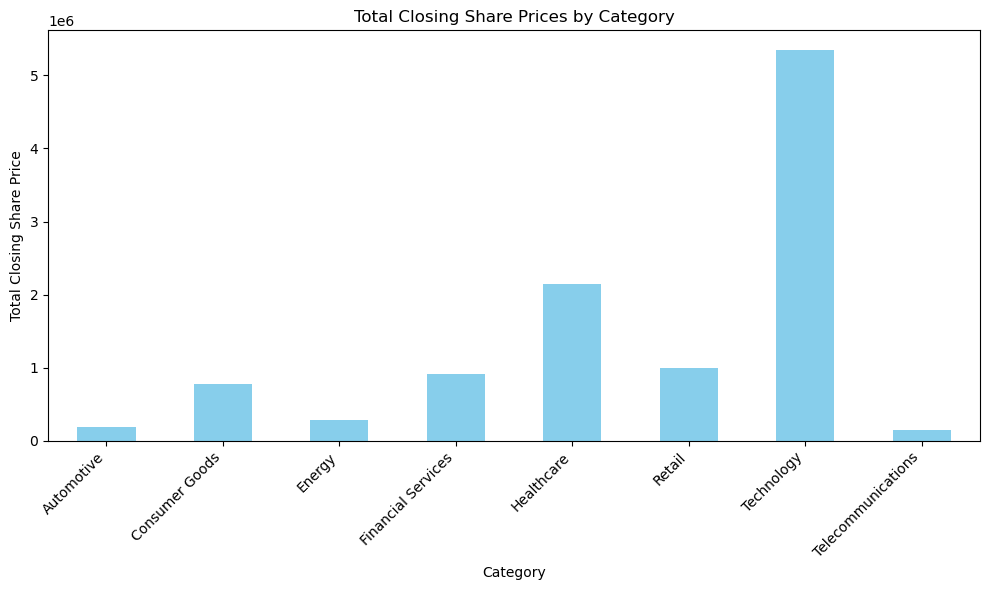

In [14]:
import matplotlib.pyplot as plt

#1 Group the DataFrame by the "Category" column and sum the closing share prices
category_totals = df.groupby('Category')['Close'].sum()

# Plot the total closing share prices for each category
plt.figure(figsize=(10, 6))
category_totals.plot(kind='bar', color='skyblue')
plt.title('Total Closing Share Prices by Category')
plt.xlabel('Category')
plt.ylabel('Total Closing Share Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

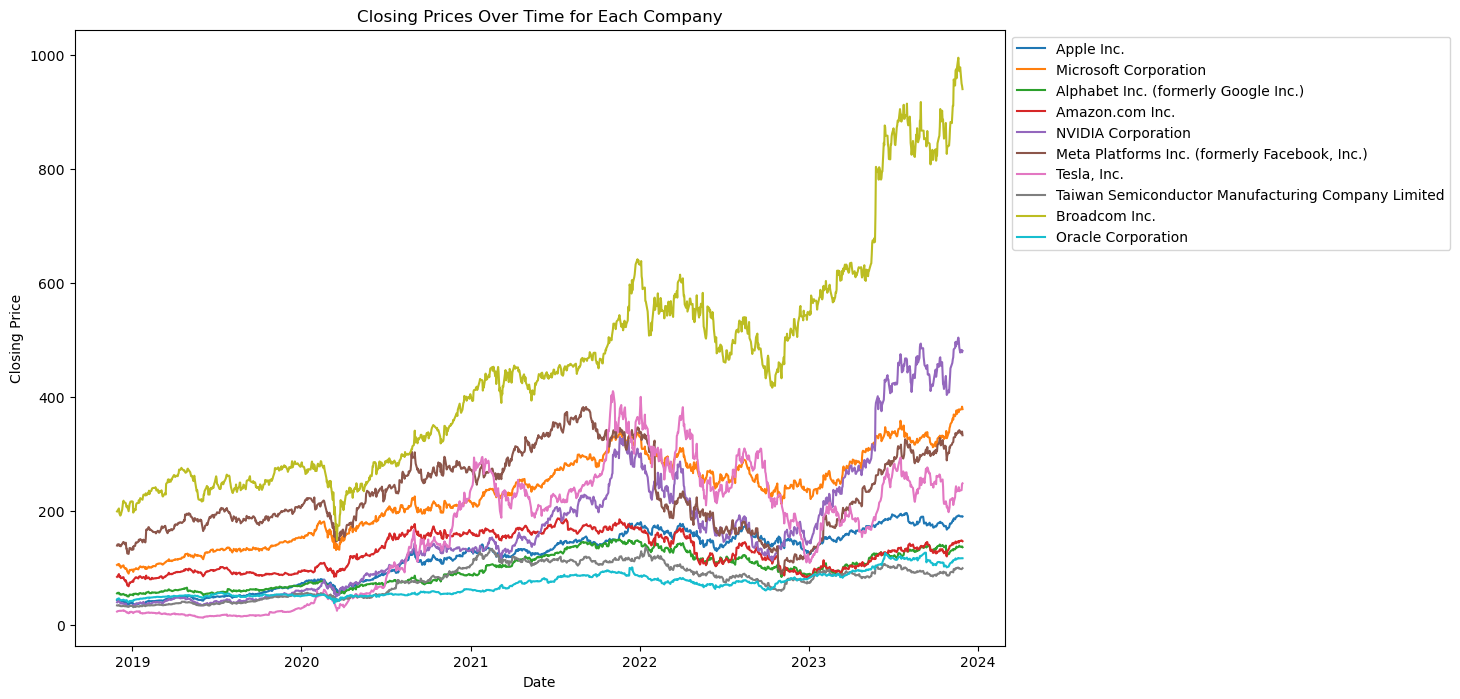

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Get unique companies
technology_companies = df[df['Category'] == 'Technology']['Company'].unique()[:10]

# Plot closing prices over time for each company
plt.figure(figsize=(12, 8))
for company in technology_companies:
    company_data = df[df['Company'] == company]
    plt.plot(company_data['Date'], company_data['Close'], label=company)

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Prices Over Time for Each Company')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


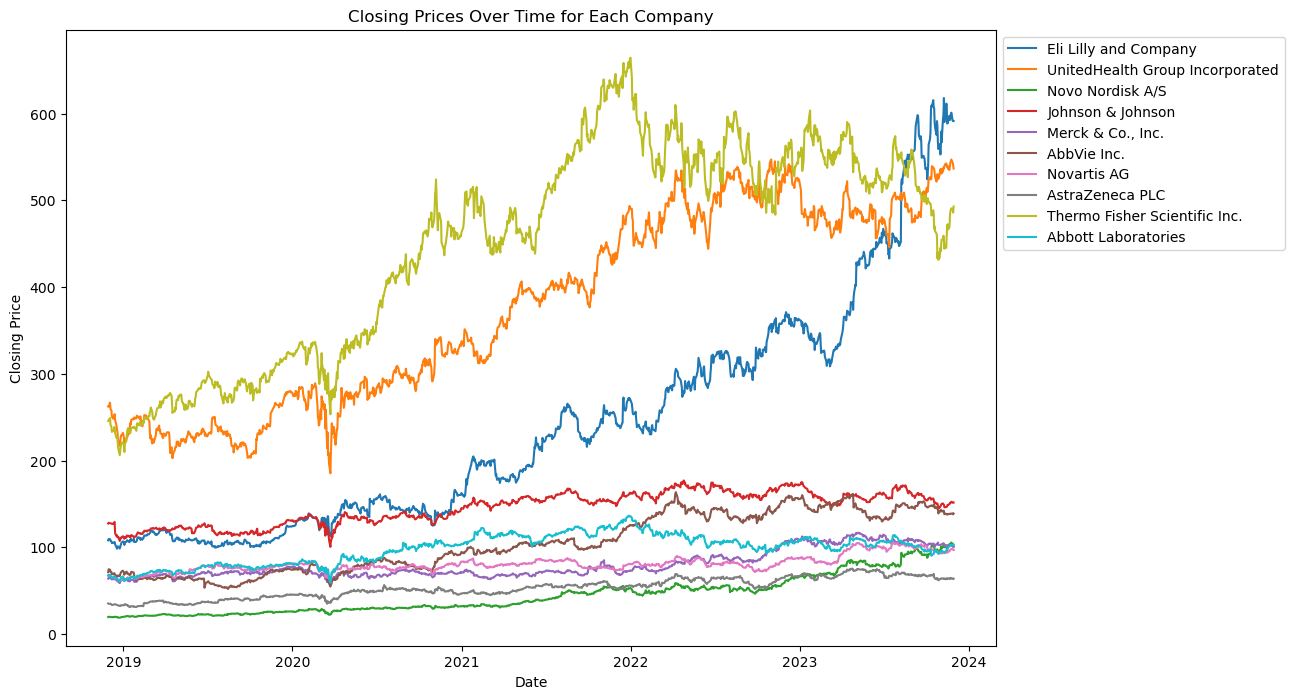

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Get unique companies
technology_companies = df[df['Category'] == 'Healthcare']['Company'].unique()[:10]

# Plot closing prices over time for each company
plt.figure(figsize=(12, 8))
for company in technology_companies:
    company_data = df[df['Company'] == company]
    plt.plot(company_data['Date'], company_data['Close'], label=company)

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Prices Over Time for Each Company')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

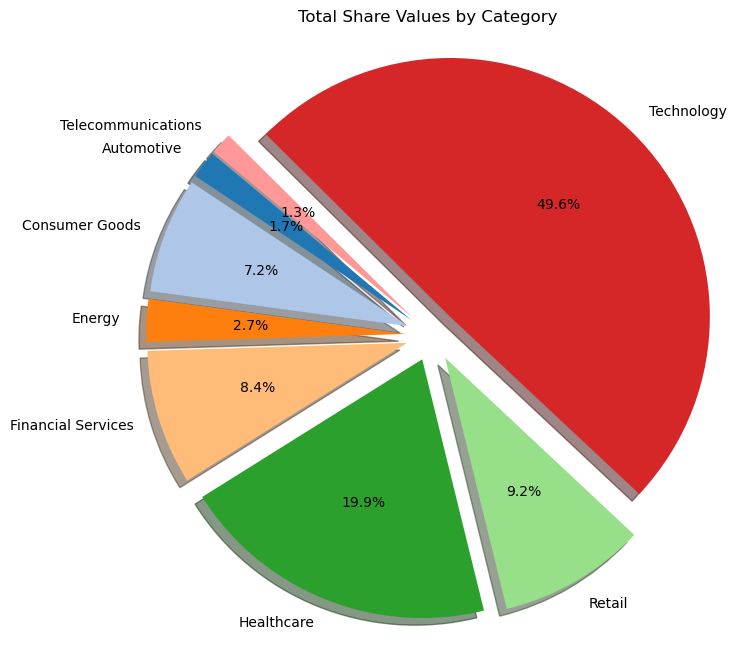

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Filter technology and non-technology companies
# Calculate total share values for technology and non-technology companies
category_total_share = df.groupby('Category')['Close'].sum()

# Plot the pie chart
plt.figure(figsize=(8, 8))
labels = category_total_share.index
sizes = category_total_share.values
colors = plt.cm.tab20.colors  # Using a colormap for colors
explode = [0.1] * len(labels)  # explode all slices
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Total Share Values by Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


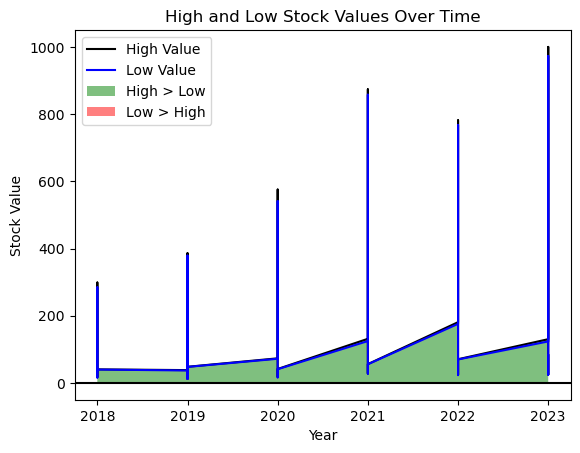

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame containing the data
# If not, replace it with your DataFrame name

# Extracting year and high/low stock values from DataFrame
years = pd.to_datetime(df['Date']).dt.year
high_values = df['High']
low_values = df['Low']

fig, ax = plt.subplots()

# Plotting high and low stock values
ax.plot(years, high_values, color='black', label='High Value')
ax.plot(years, low_values, color='blue', label='Low Value')

# Highlighting regions where high value > low value and vice versa
ax.fill_between(years, high_values, where=high_values > low_values, facecolor='green', alpha=.5, label='High > Low')
ax.fill_between(years, low_values, where=low_values > high_values, facecolor='red', alpha=.5, label='Low > High')

# Adding horizontal line at y=0
ax.axhline(0, color='black')

# Adding legend and labels
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Stock Value')
ax.set_title('High and Low Stock Values Over Time')

plt.show()


In [19]:
season_counts = df['Season'].value_counts()

# Print the counts
print("Number of data points in each season:")
print(season_counts)

Number of data points in each season:
Season
Summer    21675
Spring    16269
Winter    15351
Fall      10863
Name: count, dtype: int64


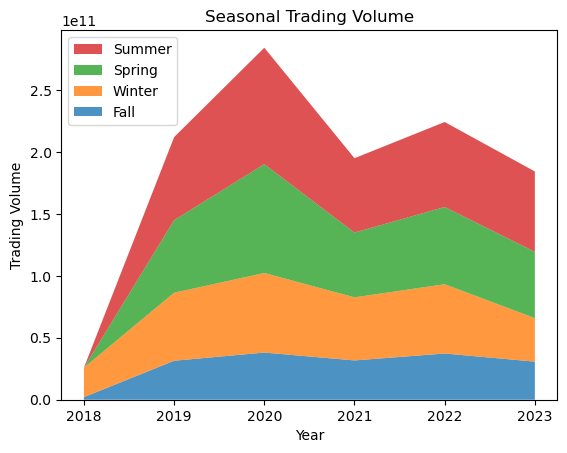

In [20]:
import matplotlib.pyplot as plt

# Define the years
years = df['Date'].dt.year.unique()

# Define the seasons
seasons = df['Season'].unique()

# Initialize a dictionary to store population data by season
population_by_season = {season: [] for season in seasons}

# Calculate the total trading volume for each season in each year
for year in years:
    year_data = df[df['Date'].dt.year == year]
    for season in seasons:
        season_data = year_data[year_data['Season'] == season]
        total_volume = season_data['Volume'].sum()
        population_by_season[season].append(total_volume)

# Plot the stacked area plot
fig, ax = plt.subplots()
ax.stackplot(years, population_by_season.values(),
             labels=population_by_season.keys(), alpha=0.8)
ax.legend(loc='upper left', reverse=True)
ax.set_title('Seasonal Trading Volume')
ax.set_xlabel('Year')
ax.set_ylabel('Trading Volume')

plt.show()


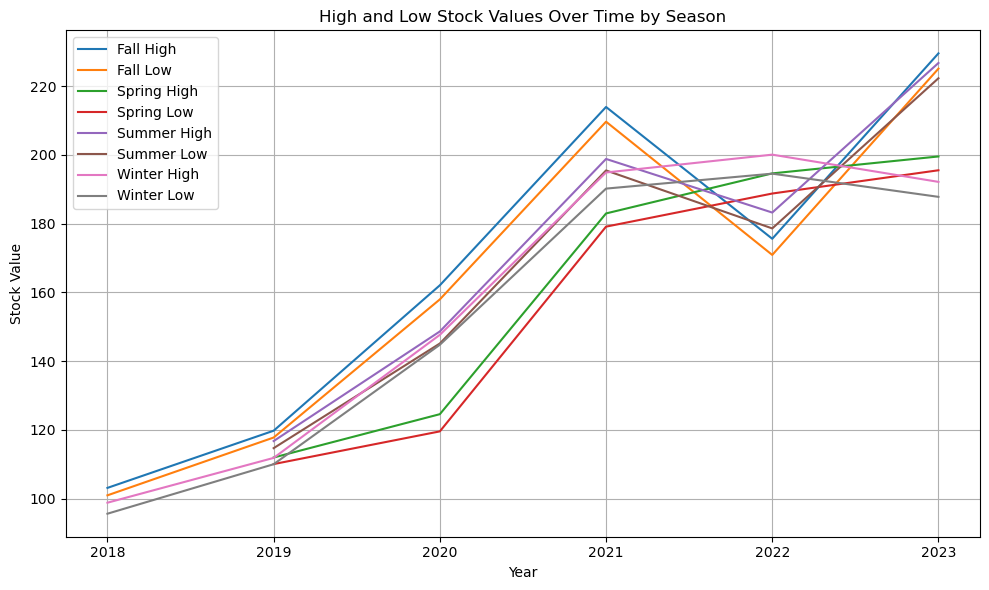

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'Date': pd.date_range(start='2018-01-01', end='2023-12-31', freq='D'),
    'High': np.random.rand(730) * 100,  # High values
    'Low': np.random.rand(730) * 50,     # Low values
}


# Extract year and month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Assign season based on month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['Season'] = df['Month'].apply(get_season)

# Group by season and year, calculate mean of high and low values
seasonal_data = df.groupby(['Season', 'Year']).agg({'High': 'mean', 'Low': 'mean'}).reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
for season, data in seasonal_data.groupby('Season'):
    ax.plot(data['Year'], data['High'], label=f'{season} High')
    ax.plot(data['Year'], data['Low'], label=f'{season} Low')

ax.set_xlabel('Year')
ax.set_ylabel('Stock Value')
ax.set_title('High and Low Stock Values Over Time by Season')
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\gaura\AppData\Local\Temp\ipykernel_21624\3211815860.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  category_colors = plt.cm.get_cmap('RdYlGn')(np.linspace(0.15, 0.85, len(data)))


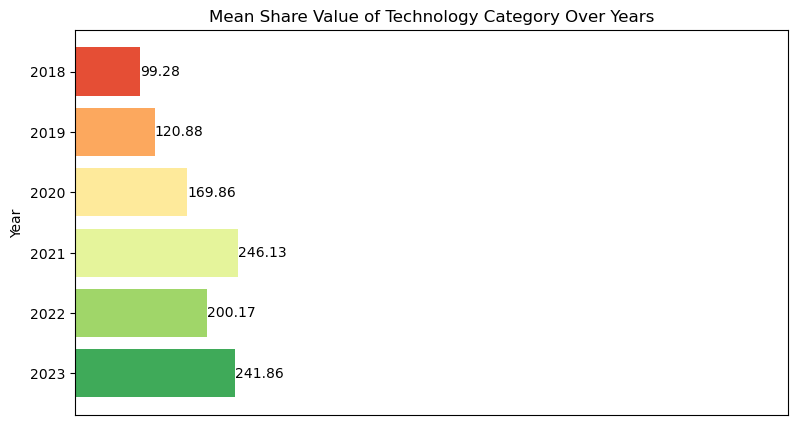

In [22]:
import matplotlib.pyplot as plt
import numpy as np

def survey(df):
    """
    Parameters
    ----------
    df : DataFrame
        DataFrame containing the data. Each row represents a category, 
        and each column represents the share value for each year.
    """
    # Filter the DataFrame for the "Technology" category
    df_technology = df[df['Category'] == 'Technology']
    
    # Group by year and category and calculate the mean share value
    grouped = df_technology.groupby('Year')['Close'].mean()

    labels = grouped.index
    data = grouped.values
    category_colors = plt.cm.get_cmap('RdYlGn')(np.linspace(0.15, 0.85, len(data)))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data))

    # Plot the data
    for i, (year, share_value) in enumerate(zip(labels, data)):
        ax.barh(year, share_value, color=category_colors[i])
        ax.text(share_value, year, f'{share_value:.2f}', ha='left', va='center', color='black')

    ax.set_xlabel('Mean Share Value')
    ax.set_ylabel('Year')
    ax.set_title('Mean Share Value of Technology Category Over Years')

    plt.show()

survey(df)



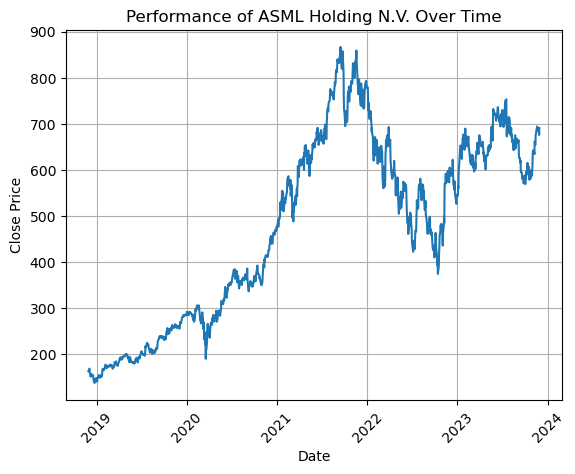

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the necessary columns (Date, Company, Close, etc.)

# Step 1: Calculate the total share value for each company
company_share = df.groupby('Company')['Close'].sum()

# Step 2: Find the company with the highest total share value
top_company = company_share.idxmax()  # Get the index of the company with the highest total share value

# Step 3: Filter the DataFrame for the top performing company and plot its performance over time
top_company_data = df[df['Company'] == top_company]
plt.plot(top_company_data['Date'], top_company_data['Close'])
plt.title(f"Performance of {top_company} Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [24]:
# Assuming df is your DataFrame containing company names and categories

# Step 1: Extract unique company names
unique_companies = df['Company'].unique()

# Step 2: For each unique company name, extract the corresponding category
categories = []
for company in unique_companies:
    category = df[df['Company'] == company]['Category'].iloc[0]  # Get the category for the first occurrence of the company
    categories.append(category)

# Step 3: Count the occurrences of each category
category_counts = {}
for category in categories:
    if category in category_counts:
        category_counts[category] += 1
    else:
        category_counts[category] = 1

print(category_counts)


{'Technology': 22, 'Healthcare': 11, 'Financial Services': 5, 'Retail': 3, 'Energy': 3, 'Consumer Goods': 5, 'Automotive': 1, 'Telecommunications': 1}
